In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression 
import os

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.drop(columns = "Name",inplace=True)
df.drop(columns = "PassengerId",inplace=True)
df.drop(columns = "Ticket",inplace=True)

In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
177/891*100

19.865319865319865

In [7]:
687/891*100

77.10437710437711

In [8]:
df.isnull().sum().sum()

866

In [9]:
df["Age"].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [10]:
df.drop(columns = "Cabin",inplace = True)

In [11]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
print("median",df["Age"].median())
print(df["Age"].describe())

median 28.0
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [13]:
df["Age"].fillna(value = 28.0 , inplace = True)

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [15]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [16]:
df.ffill(inplace=True)

In [17]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
df.duplicated().sum()

116

In [19]:
df.drop_duplicates(inplace = True)

In [20]:
df.duplicated().sum()

0

In [21]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [23]:
import seaborn as sns
def outliers(x):
    y=x.select_dtypes(include=[int,float])
    for i in y:
        sns.boxplot(x=df[i])
        plt.title(i)
        plt.show()

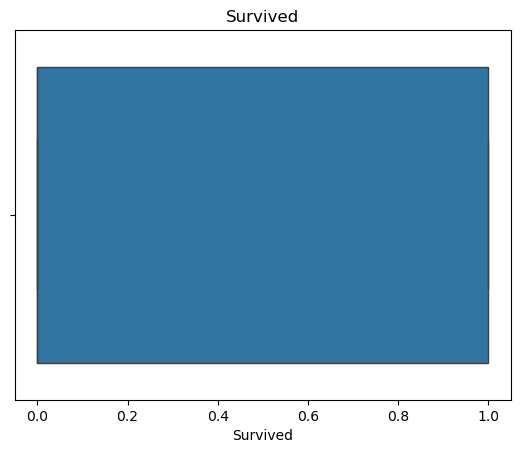

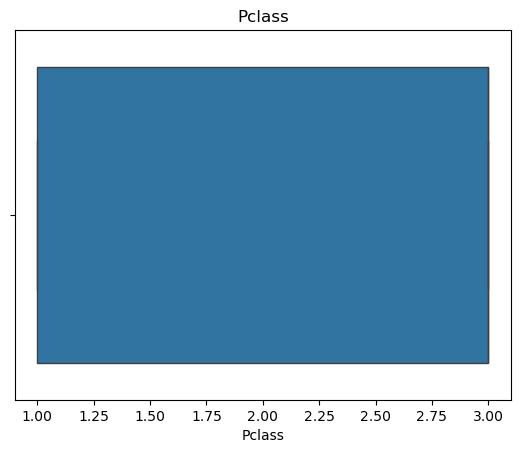

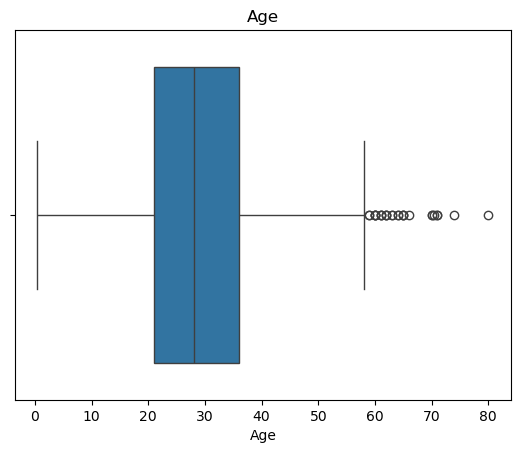

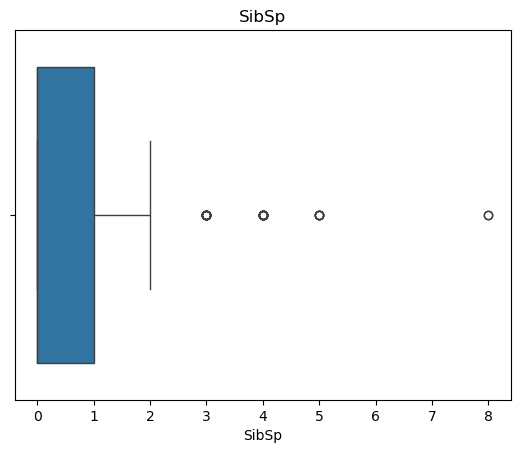

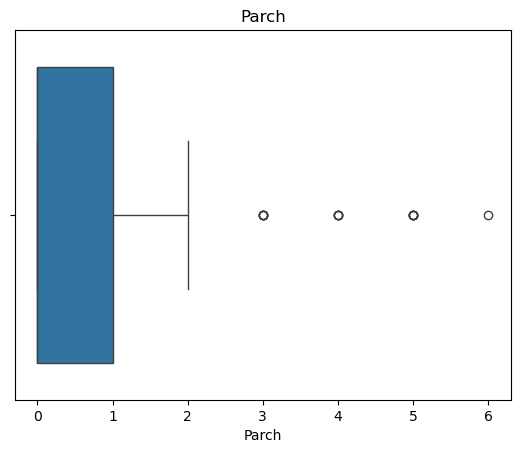

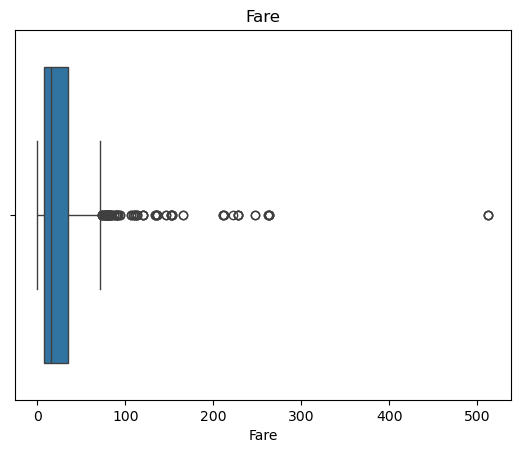

In [24]:
outliers(df)

In [25]:
def IQR(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    LF = q1 - (1.5*iqr)
    UF = q3 + (1.5*iqr)
    print("LF-->",LF)
    print("UF-->",UF)

In [26]:
IQR(df["Age"])

LF--> -1.5
UF--> 58.5


In [27]:
IQR(df["Fare"])

LF--> -31.171850000000003
UF--> 73.41975000000001


In [28]:
IQR(df["Parch"])

LF--> -1.5
UF--> 2.5


In [29]:
IQR(df["Pclass"])

LF--> -2.0
UF--> 6.0


In [30]:
IQR(df["SibSp"])

LF--> -1.5
UF--> 2.5


In [31]:
IQR(df["Survived"])

LF--> -1.5
UF--> 2.5


In [32]:
df["Age"] = np.where(df["Age"]>54,54,df["Age"])
df["Fare"] = np.where(df["Fare"]>73.419,73.419,df["Fare"])

In [33]:
import seaborn as sns
def outliers(x):
    y=x.select_dtypes(include=[int,float])
    for i in y:
        sns.boxplot(x=df[i])
        plt.title(i)
        plt.show()

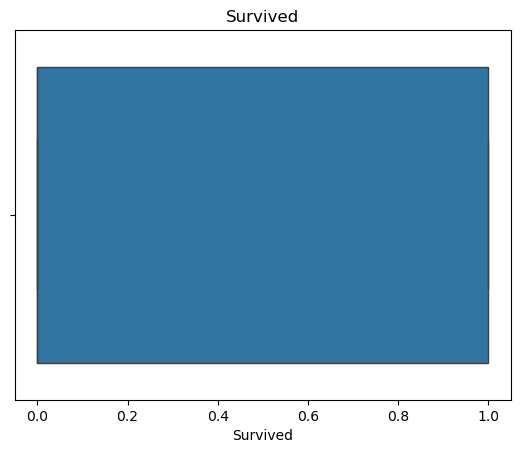

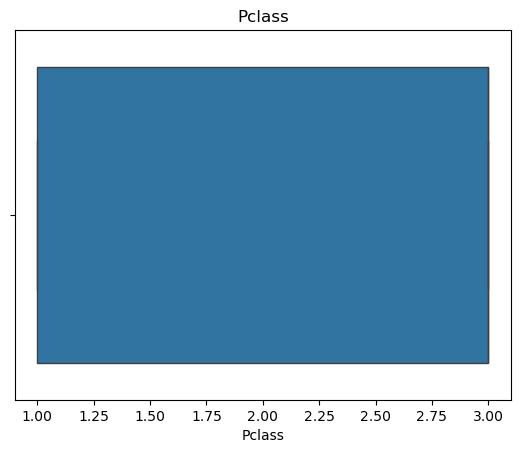

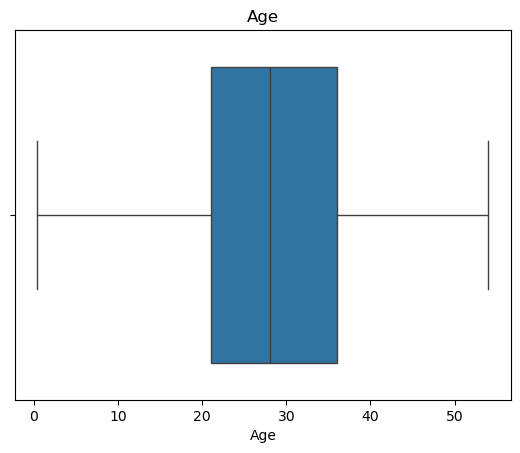

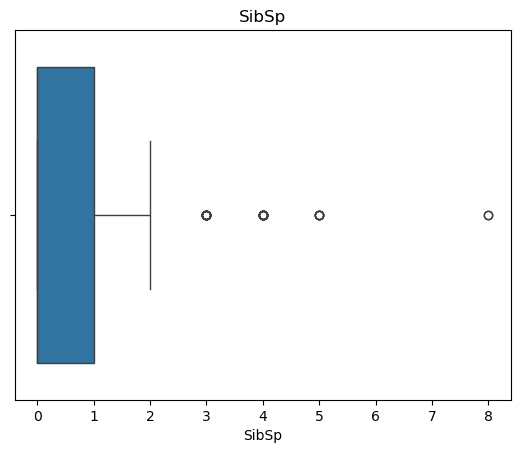

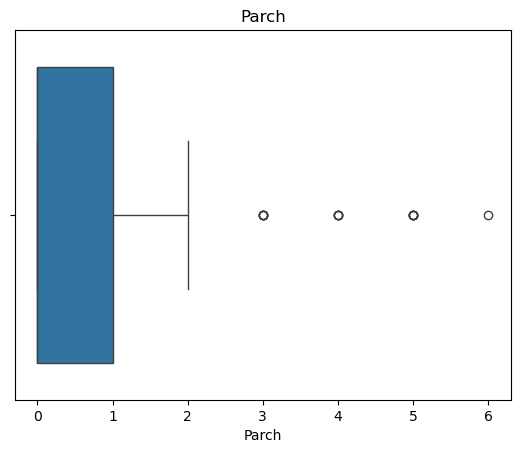

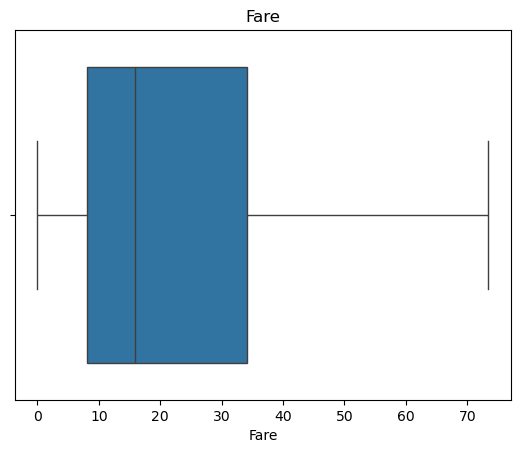

In [34]:
outliers(df)

In [35]:
df.select_dtypes(object).columns

Index(['Sex', 'Embarked'], dtype='object')

In [36]:
df["Embarked"].value_counts()

Embarked
S    560
C    156
Q     59
Name: count, dtype: int64

In [37]:
df["Sex"] = np.where(df["Sex"]=="male",1,0)

In [38]:
df["Pclass"].value_counts()

Pclass
3    401
1    210
2    164
Name: count, dtype: int64

In [39]:
df1 = pd.get_dummies(df, columns = ['Embarked'])

In [40]:
df1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [41]:
X = df1[[ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S']]
y = df1["Survived"]

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=55)

In [43]:
lr = LogisticRegression()

In [44]:
lr.fit(X_train,y_train)

LogisticRegression()

In [45]:
print("Train accuracy",lr.score(X_train,y_train))
print("Test Accuracy",lr.score(X_test,y_test))

Train accuracy 0.7790322580645161
Test Accuracy 0.7741935483870968


In [46]:
# sample = df1.copy()

In [47]:
# sample.columns

In [48]:
# sample.drop(columns = "Survived",inplace=True)

In [49]:
# sample.columns

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_train,lr.predict(X_train)))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       367
           1       0.74      0.71      0.72       253

    accuracy                           0.78       620
   macro avg       0.77      0.77      0.77       620
weighted avg       0.78      0.78      0.78       620



In [52]:
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80        88
           1       0.75      0.72      0.73        67

    accuracy                           0.77       155
   macro avg       0.77      0.77      0.77       155
weighted avg       0.77      0.77      0.77       155



In [53]:
# pro_train = pd.DataFrame(lr.predict_proba(X_train),columns=["Sex_female","Sex_male"])

In [54]:
# copy=X_train.copy()

In [55]:
# copy

In [56]:
# copy["pre_y"] = lr.predict(copy)

In [57]:
# copy

In [58]:
# copy["manual_pre_y"] = np.where(pro_train["Sex_male"]>0.5,1,0)

In [59]:
# copy.head(50)

In [60]:
# actual = y_train
# pre = np.where(pro_train["Sex_male"]>0.3,1,0)

In [61]:
# sample

In [62]:
# print(classification_report(actual,pre))

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=88)
dt.fit(X_train,y_train)
print("Train Accuracy",dt.score(X_train,y_train))
print("Test Accuracy",dt.score(X_test,y_test))

Train Accuracy 0.9822580645161291
Test Accuracy 0.7483870967741936


In [64]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=5)
dt.fit(X_train,y_train)
print("TrainAccuracy",dt.score(X_train,y_train))
print("Test accuracy",dt.score(X_test,y_test))

TrainAccuracy 0.9822580645161291
Test accuracy 0.7354838709677419


In [65]:
help(dt)

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies a

In [66]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth = 3,
                          min_samples_split=5,random_state=5)
dt.fit(X_train,y_train)
print("TrainAccuracy",dt.score(X_train,y_train))
print("Test accuracy",dt.score(X_test,y_test))

TrainAccuracy 0.8145161290322581
Test accuracy 0.7935483870967742


In [67]:
dt=DecisionTreeClassifier(criterion="entropy",
                          max_depth=10, min_samples_split=300, min_samples_leaf=12,random_state=5)
dt.fit(X_train,y_train)
print("TrainAccuracy",dt.score(X_train,y_train))
print("Test accuracy",dt.score(X_test,y_test))

TrainAccuracy 0.7774193548387097
Test accuracy 0.7677419354838709


In [68]:
criterion = ["gini","entropy"]
max_dept = [4,6,8,10,12,14]
min_sam_sp = [10,20,30,40,50,60,70,80,90,100]
for c in criterion:
    for d in max_dept:
        for s in min_sam_sp:
            dt = DecisionTreeClassifier(criterion = c,
                                        max_depth = d,
                                        min_samples_split = s, min_samples_leaf = 1,
                                        random_state = 55)
            dt.fit(X_train,y_train)
            print("criterion {} max_dept {} min_sample_sp  ------>  {}".format(c,d,s))
            print("Train Accuracy",dt.score(X_train,y_train))
            print("Test Accuracy",dt.score(X_test,y_test))
            print("=================================")

criterion gini max_dept 4 min_sample_sp  ------>  10
Train Accuracy 0.8258064516129032
Test Accuracy 0.7870967741935484
criterion gini max_dept 4 min_sample_sp  ------>  20
Train Accuracy 0.8258064516129032
Test Accuracy 0.7870967741935484
criterion gini max_dept 4 min_sample_sp  ------>  30
Train Accuracy 0.8112903225806452
Test Accuracy 0.7677419354838709
criterion gini max_dept 4 min_sample_sp  ------>  40
Train Accuracy 0.8112903225806452
Test Accuracy 0.7677419354838709
criterion gini max_dept 4 min_sample_sp  ------>  50
Train Accuracy 0.8112903225806452
Test Accuracy 0.7677419354838709
criterion gini max_dept 4 min_sample_sp  ------>  60
Train Accuracy 0.8112903225806452
Test Accuracy 0.7677419354838709
criterion gini max_dept 4 min_sample_sp  ------>  70
Train Accuracy 0.8112903225806452
Test Accuracy 0.7677419354838709
criterion gini max_dept 4 min_sample_sp  ------>  80
Train Accuracy 0.8112903225806452
Test Accuracy 0.7677419354838709
criterion gini max_dept 4 min_sample_sp 

In [69]:
dt = DecisionTreeClassifier(criterion = "entropy",
                                        max_depth = 10,
                                        min_samples_split = 10, min_samples_leaf = 1,
                                        random_state = 55)
dt.fit(X_train,y_train)
print("Train Accuracy",dt.score(X_train,y_train))
print("Test Accuracy",dt.score(X_test,y_test))

Train Accuracy 0.882258064516129
Test Accuracy 0.7741935483870968


In [70]:
from sklearn.tree import plot_tree

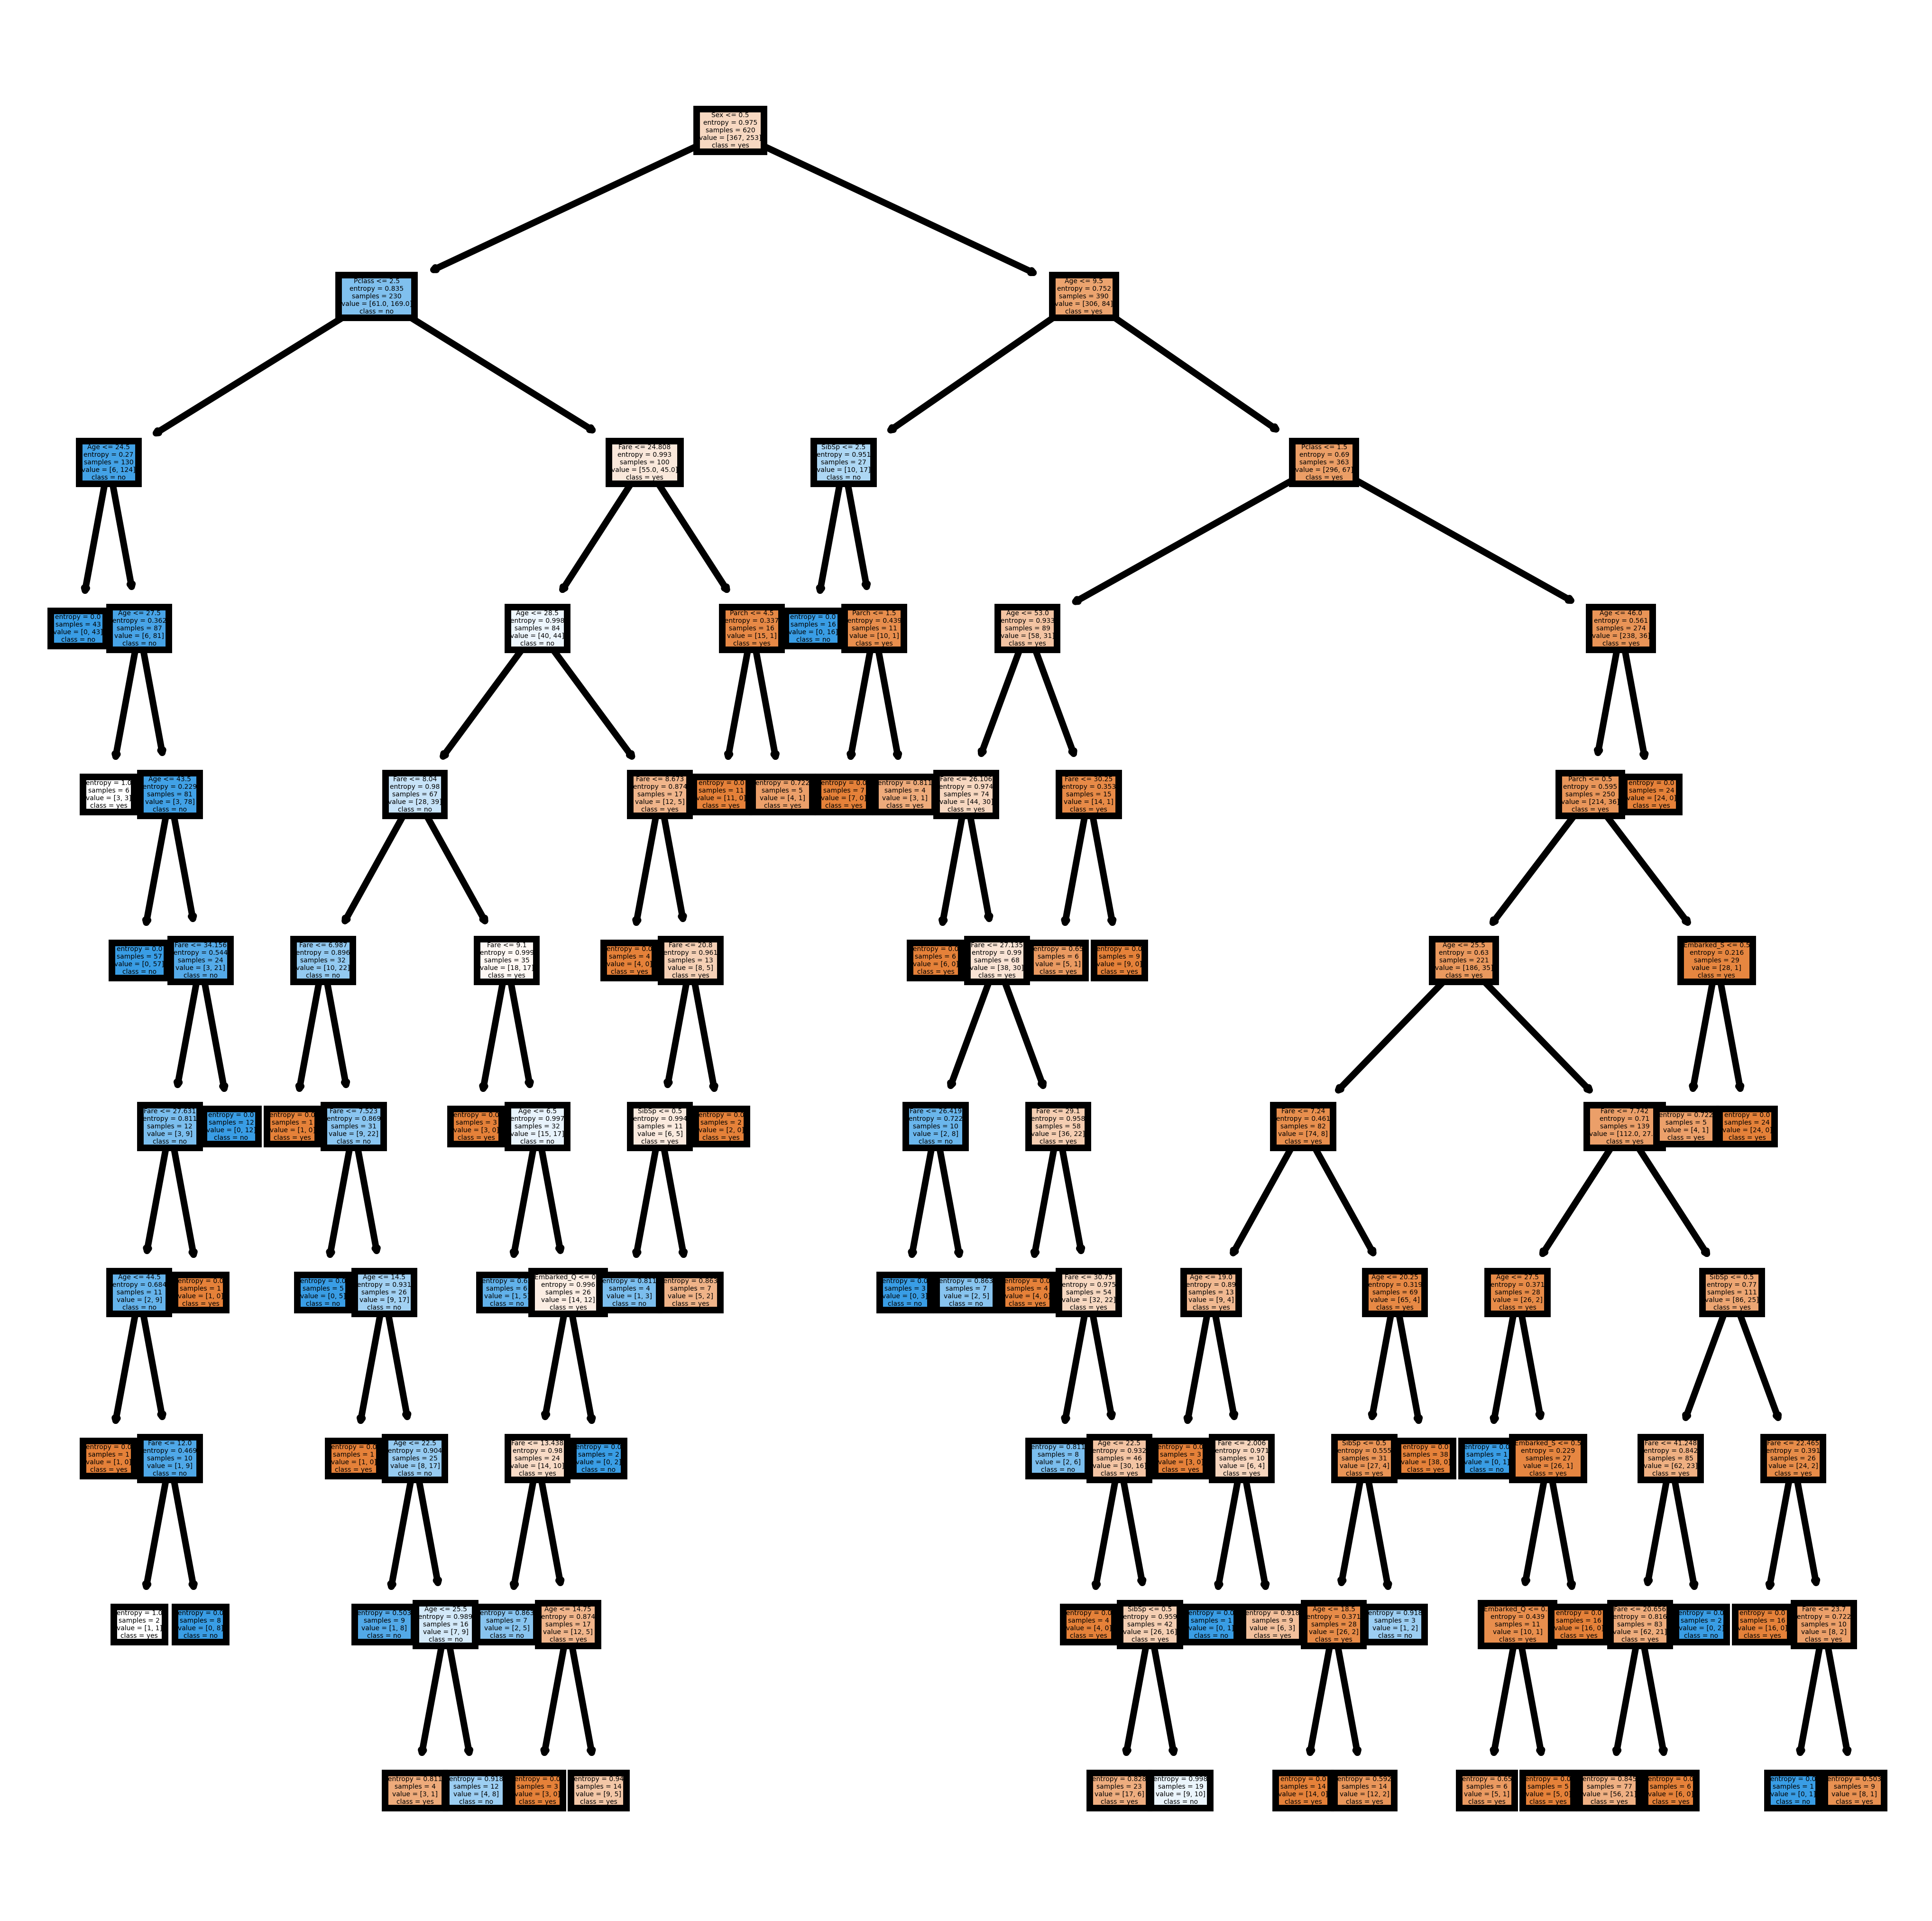

In [71]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(5,5), dpi=1000)
plot_tree(dt,feature_names=  X_train.columns, class_names = ["yes","no"],
         filled = True)
plt.show()

In [72]:
dt = DecisionTreeClassifier(random_state = 55)
dt.fit(X_train,y_train)
print("Train Accuracy",dt.score(X_train,y_train))
print("Test Accuracy",dt.score(X_test,y_test))

Train Accuracy 0.9822580645161291
Test Accuracy 0.7354838709677419


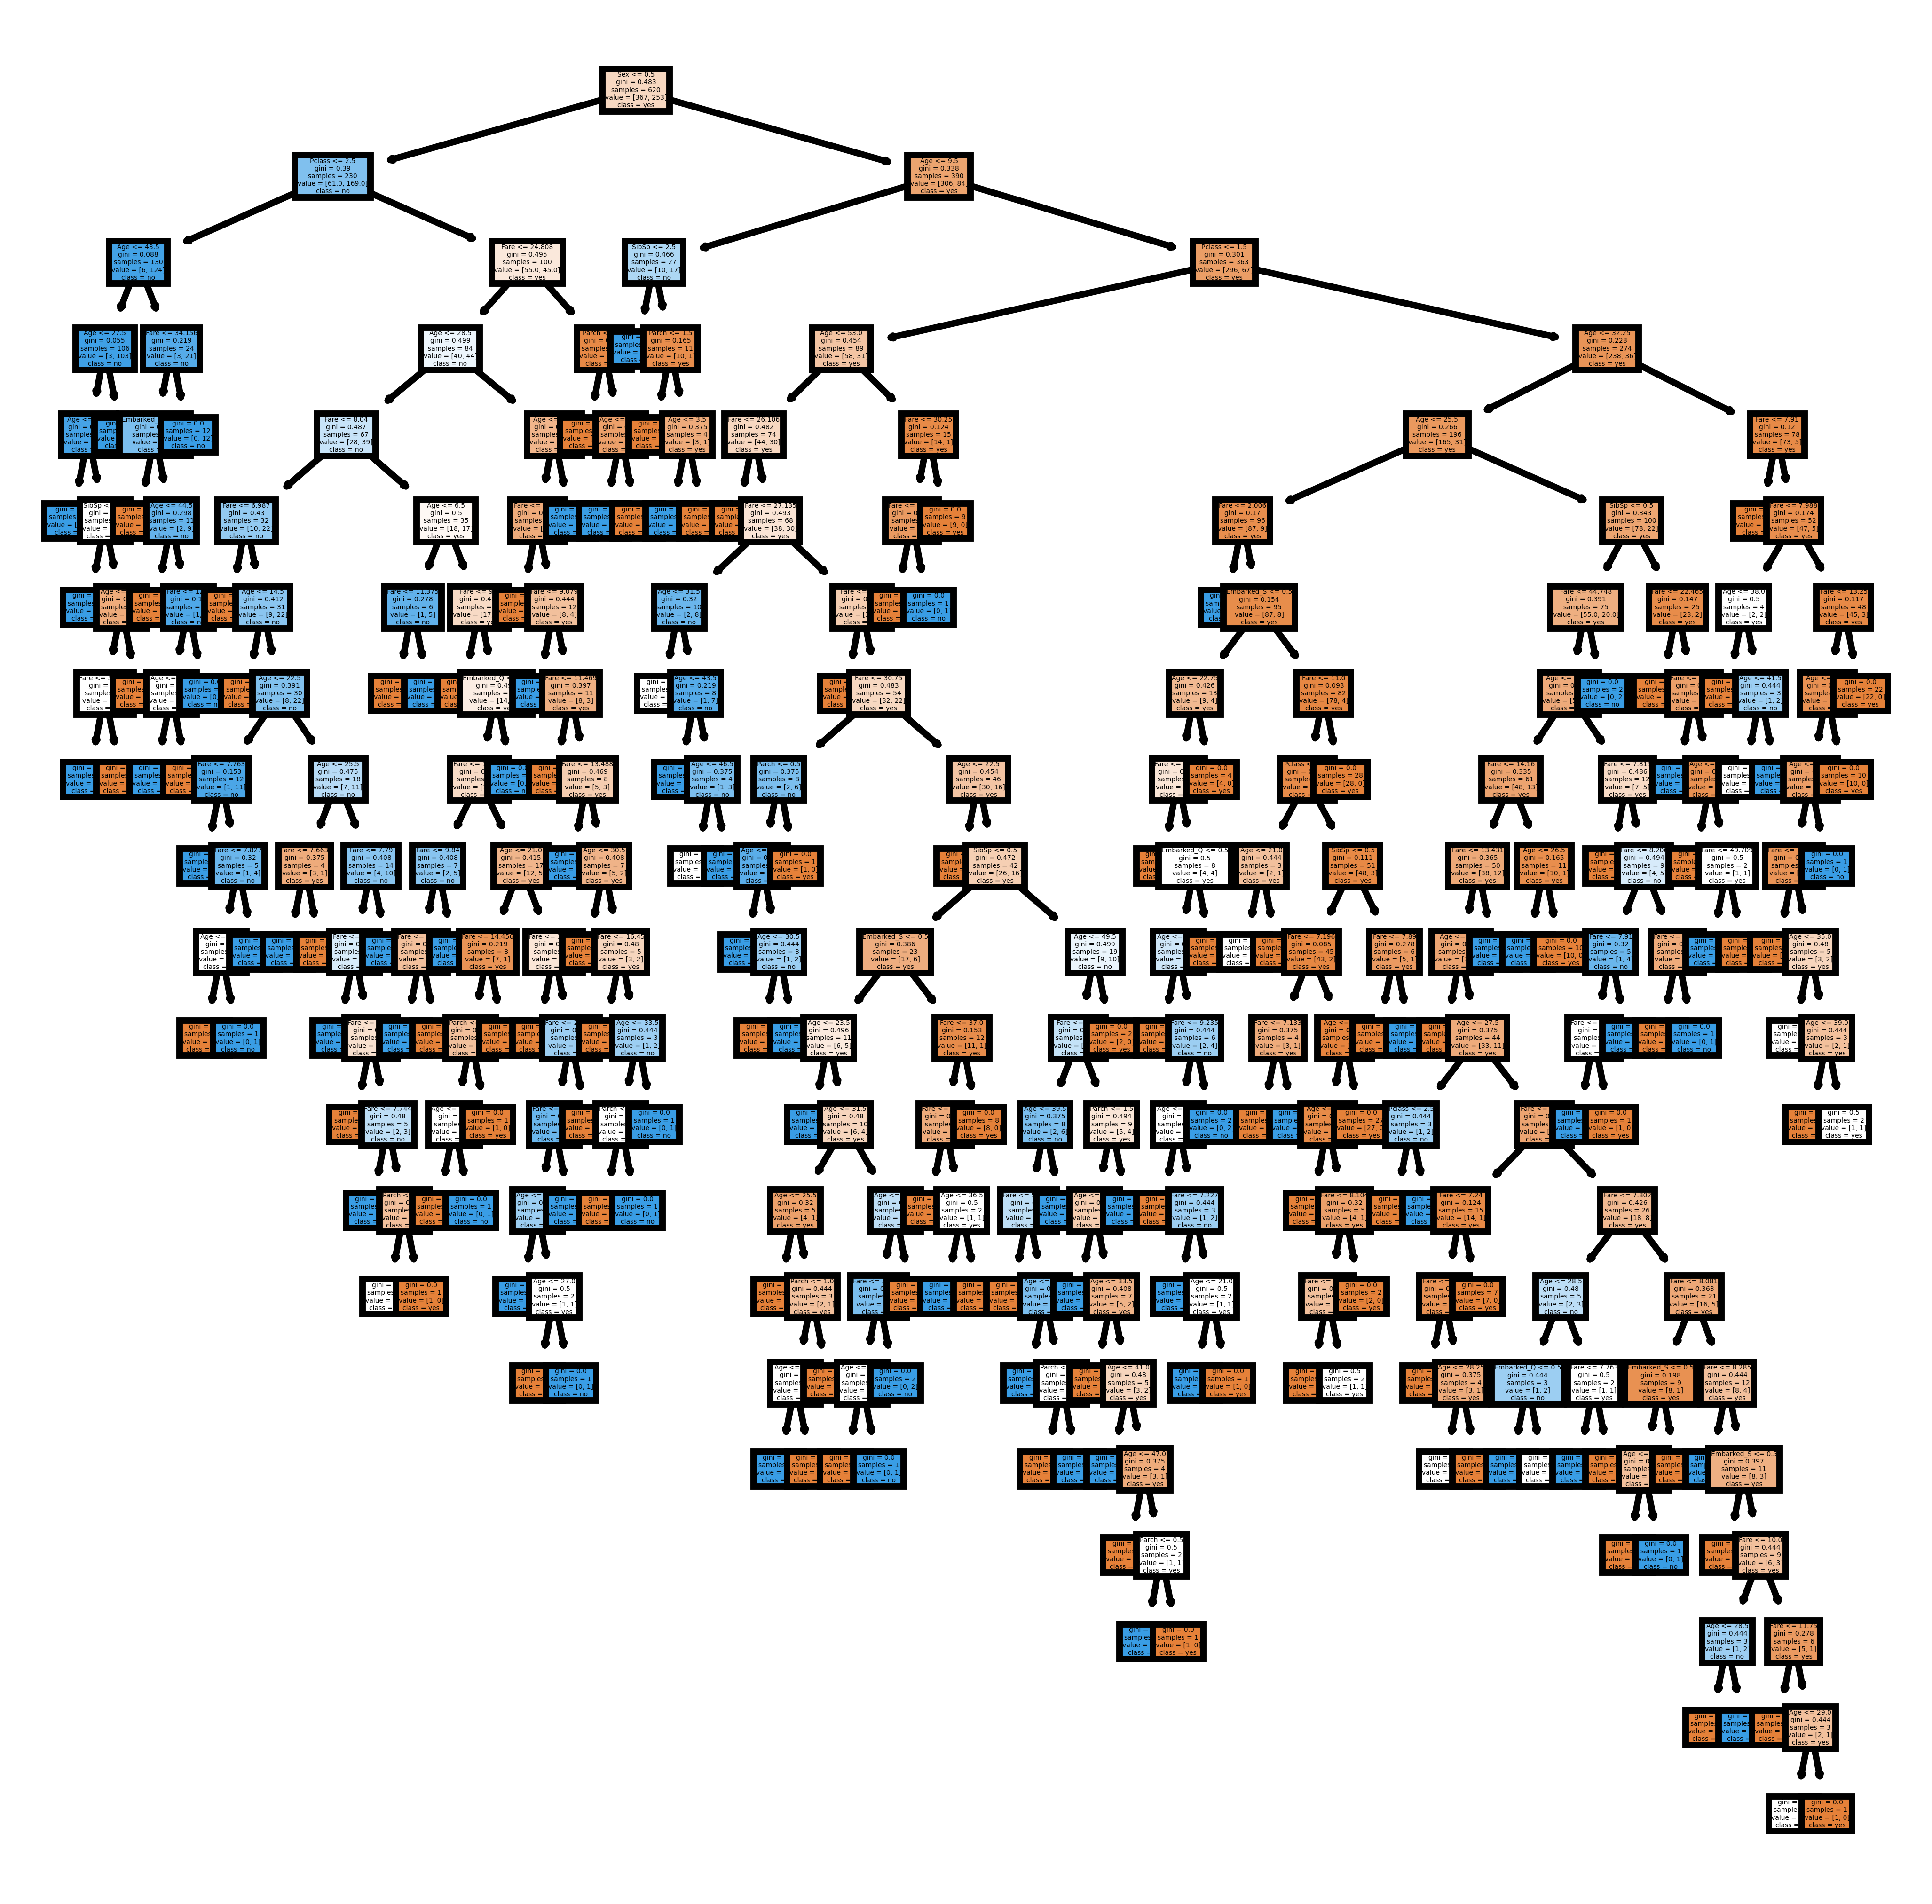

In [73]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(5,5), dpi=1000)
plot_tree(dt,feature_names=  X_train.columns, class_names = ["yes","no"],
         filled = True)
plt.show()

In [74]:
from sklearn import tree

In [75]:
rules = tree.export_text(dt, feature_names = X_train.columns, class_names =["yes","no"])

In [76]:
print(rules)

|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 43.50
|   |   |   |--- Age <= 27.50
|   |   |   |   |--- Age <= 24.50
|   |   |   |   |   |--- class: no
|   |   |   |   |--- Age >  24.50
|   |   |   |   |   |--- SibSp <= 0.50
|   |   |   |   |   |   |--- class: no
|   |   |   |   |   |--- SibSp >  0.50
|   |   |   |   |   |   |--- Age <= 25.50
|   |   |   |   |   |   |   |--- Fare <= 51.71
|   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |   |--- Fare >  51.71
|   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |--- Age >  25.50
|   |   |   |   |   |   |   |--- class: yes
|   |   |   |--- Age >  27.50
|   |   |   |   |--- class: no
|   |   |--- Age >  43.50
|   |   |   |--- Fare <= 34.16
|   |   |   |   |--- Embarked_S <= 0.50
|   |   |   |   |   |--- class: yes
|   |   |   |   |--- Embarked_S >  0.50
|   |   |   |   |   |--- Age <= 44.50
|   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |--- Age >  44.50
|   |   |   |   

In [77]:
dt = DecisionTreeClassifier(criterion = "entropy",
                                        max_depth = 10,
                                        min_samples_split = 10, min_samples_leaf = 1,
                                        random_state = 55)
dt.fit(X_train,y_train)
print("Train Accuracy",dt.score(X_train,y_train))
print("Test Accuracy",dt.score(X_test,y_test))

Train Accuracy 0.882258064516129
Test Accuracy 0.7741935483870968


In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
dt

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=55)

In [80]:
para = {"criterion":["gini","entropy"],
       "max_depth":[2,4,6,8,10,12,14,16,18,20,22,23,24,25,26,27],
       "min_samples_split":[10,20,30,40,50,60,70,80,90,100]}
tre = DecisionTreeClassifier(random_state=88)

grid = GridSearchCV(tre, param_grid=para, cv=10, verbose=1, n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=88),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                       23, 24, 25, 26, 27],
                         'min_samples_split': [10, 20, 30, 40, 50, 60, 70, 80,
                                               90, 100]},
             verbose=1)

In [81]:
grid.score(X_train,y_train)

0.8258064516129032

In [82]:
grid.score(X_test,y_test)

0.7741935483870968

In [83]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 10}

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf = RandomForestClassifier(random_state = 77)

In [86]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=77)

In [87]:
print("TrainAccuracy",rf.score(X_train,y_train))
print("Test accuracy",rf.score(X_test,y_test))

TrainAccuracy 0.9822580645161291
Test accuracy 0.7935483870967742


In [88]:
rf1 = RandomForestClassifier(n_estimators = 150,criterion = "entropy",
                                        max_depth = 10,
                                        min_samples_split = 10, min_samples_leaf = 1,
                                        random_state = 55)

In [89]:
rf1.fit(X_train,y_train)
print("TrainAccuracy",rf1.score(X_train,y_train))
print("Test accuracy",rf1.score(X_test,y_test))

TrainAccuracy 0.8790322580645161
Test accuracy 0.8387096774193549


In [90]:
rf1 = RandomForestClassifier(n_estimators = 100, random_state = 88)

In [91]:
rf1.fit(X_train,y_train)
print("TrainAccuracy",rf1.score(X_train,y_train))
print("Test accuracy",rf1.score(X_test,y_test))

TrainAccuracy 0.9822580645161291
Test accuracy 0.8


In [92]:
model = [100,150,200,250,300,350]
cri = ["gini","entropy"]
md = [10,20,30,40,50,60,70,80,90,100]
ms = [40,50,60,70,80,90,100]
for m in model:
    for c in cri:
        for d in md:
            for s in ms:
                rf = RandomForestClassifier(n_estimators = m,
                                            criterion = c,
                                            max_depth = d, min_samples_split = s,
                                            random_state = 88)
                rf.fit(X_train,y_train)
                print("model -> {}, cri -> {}, max_d -> {}, min_sam ->{}".format(m,c,d,s))
                print("TrainAccuracy",rf.score(X_train,y_train))
                print("Test accuracy",rf.score(X_test,y_test))
                print("********************************************")

model -> 100, cri -> gini, max_d -> 10, min_sam ->40
TrainAccuracy 0.8419354838709677
Test accuracy 0.8193548387096774
********************************************
model -> 100, cri -> gini, max_d -> 10, min_sam ->50
TrainAccuracy 0.8338709677419355
Test accuracy 0.8129032258064516
********************************************
model -> 100, cri -> gini, max_d -> 10, min_sam ->60
TrainAccuracy 0.8290322580645161
Test accuracy 0.8
********************************************
model -> 100, cri -> gini, max_d -> 10, min_sam ->70
TrainAccuracy 0.8387096774193549
Test accuracy 0.8
********************************************
model -> 100, cri -> gini, max_d -> 10, min_sam ->80
TrainAccuracy 0.8209677419354838
Test accuracy 0.8
********************************************
model -> 100, cri -> gini, max_d -> 10, min_sam ->90
TrainAccuracy 0.8193548387096774
Test accuracy 0.8064516129032258
********************************************
model -> 100, cri -> gini, max_d -> 10, min_sam ->100
TrainAc

KeyboardInterrupt: 

In [93]:
dt = RandomForestClassifier(criterion = "entropy",
                                        max_depth = 10,
                                        min_samples_split = 10, min_samples_leaf = 1,
                                        random_state = 55)
dt.fit(X_train,y_train)
print("Train Accuracy",dt.score(X_train,y_train))
print("Test Accuracy",dt.score(X_test,y_test))

Train Accuracy 0.8838709677419355
Test Accuracy 0.8387096774193549
